In [62]:
%cd /app

/app


In [63]:
import argparse
import os
import sys

os.environ["XLA_PYTHON_CLIENT_PREALLOCATE"] = "false"

import torch
torch.multiprocessing.set_start_method('spawn')

import jax
from lob.encoding import Vocab, Message_Tokenizer

from lob import inference_no_errcorr as inference
from lob.init_train import init_train_state, load_checkpoint, load_metadata, load_args_from_checkpoint

import numpy as np


╭─────────────────────────────── Traceback (most recent call last) ────────────────────────────────╮
│ in <module>:8                                                                                    │
│                                                                                                  │
│    5 os.environ["XLA_PYTHON_CLIENT_PREALLOCATE"] = "false"                                       │
│    6                                                                                             │
│    7 import torch                                                                                │
│ ❱  8 torch.multiprocessing.set_start_method('spawn')                                             │
│    9                                                                                             │
│   10 import jax                                                                                  │
│   11 from lob.encoding import Vocab, Message_Tokenizer                                           │
│                                                                                                  │
│ /opt/conda/envs/myenv/lib/python3.12/multiprocessing/context.py:247 in set_start_method          │
│                                                                                                  │
│   244 │                                                                                          │
│   245 │   def set_start_method(self, method, force=False):                                       │
│   246 │   │   if self._actual_context is not None and not force:                                 │
│ ❱ 247 │   │   │   raise RuntimeError('context has already been set')                             │
│   248 │   │   if method is None and force:                                                       │
│   249 │   │   │   self._actual_context = None                                                    │
│   250 │   │   │   return                                                                         │
╰──────────────────────────────────────────────────────────────────────────────────────────────────╯
RuntimeError: context has already been set

In [64]:
import sys
sys.path.append('/app/lob_bench')

In [65]:
import glob
import data_loading
import impact
import matplotlib.pyplot as plt

In [75]:
# let's see some statistics

message_paths = sorted(glob.glob('/app/data/test_set/GOOG/GOOG*message*.csv'))
print(f'{len(message_paths)} days')

m_seqs = [data_loading.load_message_df(path) for path in message_paths]

9 days


In [83]:
m_seqs[0][m_seqs[0]['event_type']==4]['size'].values.mean()

74.1745722877865

In [66]:
message_paths = sorted(glob.glob('/app/data_saved/GOOG/data_gen/GOOG*message*.csv'))
book_paths = sorted(glob.glob('/app/data_saved/GOOG/data_gen/GOOG*orderbook*.csv'))

print(len(book_paths))

128


In [67]:
m_seqs = [data_loading.load_message_df(path) for path in message_paths]
b_seqs = [data_loading.load_book_df(path) for path in book_paths]

In [7]:
mb_seqs=[impact._filter_touch_events(m,b) for m,b in zip(m_seqs,b_seqs)]

In [50]:
b_seqs[0]

,0,1,2,3,4,5,6,7,8,9,...,70,71,72,73,74,75,76,77,78,79
0,891900,300,891800,20,892000,482,891700,226,892100,784,...,-1,0,-1,0,-1,0,-1,0,-1,0
1,891900,300,891800,20,892000,482,891700,226,892100,784,...,-1,0,-1,0,-1,0,-1,0,-1,0
2,891900,372,891800,20,892000,482,891700,226,892100,784,...,-1,0,-1,0,-1,0,-1,0,-1,0
3,891900,372,891800,20,892000,482,891700,226,892100,784,...,-1,0,-1,0,-1,0,-1,0,-1,0
4,891900,372,891800,20,892000,482,891700,226,892100,784,...,-1,0,-1,0,-1,0,-1,0,-1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,892000,629,891900,464,892100,480,891800,765,892200,461,...,-1,0,-1,0,-1,0,-1,0,-1,0
496,892000,629,891900,464,892100,380,891800,765,892200,461,...,-1,0,-1,0,-1,0,-1,0,-1,0
497,892000,629,891900,464,892100,380,891800,765,892200,461,...,-1,0,-1,0,-1,0,-1,0,-1,0
498,892000,629,891900,464,892100,380,891800,765,892200,461,...,-1,0,-1,0,-1,0,-1,0,-1,0


In [60]:
midpice = []
for x in range(b_seqs[0].shape[0]):
    midpice.append((b_seqs[0].iloc[x][0] + b_seqs[0].iloc[x][2])/2)

In [61]:
midpice

[891850.0,
 891850.0,
 891850.0,
 891850.0,
 891850.0,
 891850.0,
 891850.0,
 891850.0,
 891850.0,
 891850.0,
 891850.0,
 891850.0,
 891850.0,
 891850.0,
 891850.0,
 891850.0,
 891850.0,
 891850.0,
 891850.0,
 891850.0,
 891850.0,
 891850.0,
 891850.0,
 891850.0,
 891850.0,
 891850.0,
 891850.0,
 891850.0,
 891850.0,
 891850.0,
 891850.0,
 891850.0,
 891850.0,
 891850.0,
 891850.0,
 891850.0,
 891850.0,
 891850.0,
 891850.0,
 891850.0,
 891850.0,
 891850.0,
 891850.0,
 891850.0,
 891850.0,
 891850.0,
 891850.0,
 891950.0,
 891950.0,
 891950.0,
 891950.0,
 891950.0,
 891950.0,
 891950.0,
 891950.0,
 891950.0,
 891950.0,
 891950.0,
 891950.0,
 891950.0,
 891950.0,
 891950.0,
 891950.0,
 891950.0,
 891950.0,
 891950.0,
 891950.0,
 891950.0,
 891950.0,
 891950.0,
 891950.0,
 891950.0,
 891950.0,
 891950.0,
 891950.0,
 891950.0,
 891950.0,
 891950.0,
 891950.0,
 891950.0,
 891950.0,
 891950.0,
 891950.0,
 891950.0,
 891950.0,
 891950.0,
 891950.0,
 891950.0,
 891950.0,
 891950.0,
 891950.0,

In [8]:
res=impact.macro_impact_analyse(3*60,100,32,m_seqs,b_seqs)

Concat Done
Time split & Calc done


Text(0.5, 0, 'P_i')

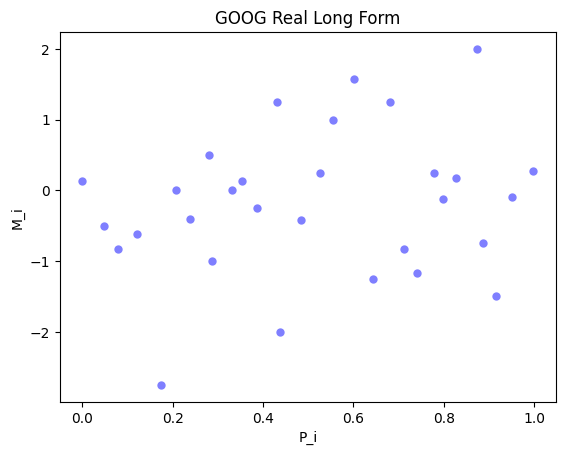

In [9]:
fig = plt.figure()
ax = plt.gca()
ax.plot(res[1][:],res[0][:], 'o', c='blue', alpha=0.5, markeredgecolor='none')
ax.set_title("GOOG Real Long Form")
ax.set_ylabel("M_i")
ax.set_xlabel("P_i")
#ax.set_ylim([-2,2])
#ax.set_yscale('log')
#ax.set_xscale('log')

In [10]:
res[0][:]

[0.125,
 -0.5,
 -0.8333333333333334,
 -0.625,
 nan,
 -2.75,
 0.0,
 -0.4,
 0.5,
 -1.0,
 0.0,
 0.125,
 -0.25,
 1.25,
 -2.0,
 -0.4166666666666667,
 0.25,
 1.0,
 nan,
 1.5714285714285714,
 -1.25,
 1.25,
 -0.8333333333333334,
 -1.1666666666666667,
 0.25,
 -0.125,
 0.16666666666666666,
 2.0,
 -0.75,
 -1.5,
 -0.1,
 0.2777777777777778]

In [11]:
# root_path="/data1/sascha/data/sqrt/GOOG/"

root_path="/app/data_saved/GOOG/"

loader = data_loading.Simple_Loader(
            real_data_path= root_path+"data_real",
            gen_data_path= root_path+"data_gen",
            cond_data_path=root_path+"data_cond",
)

In [12]:
df=impact.macro_impact_compare(100000,100,32,loader)
df


([0.21428571428571427,
  -4.0,
  -0.3333333333333333,
  -2.0,
  0.0,
  -1.25,
  -0.16666666666666666,
  -0.5,
  -1.0,
  -0.7,
  0.5,
  -1.25,
  -0.5,
  0.75,
  1.0,
  0.8333333333333334,
  0.5,
  1.0,
  1.5,
  0.5,
  -0.25,
  -2.75,
  0.0,
  -0.5,
  -2.5,
  -0.25,
  1.6666666666666667,
  0.25,
  nan,
  0.5,
  0.0,
  0.48936170212765956],
 [0.0022825099094120733,
  0.04956268221574344,
  0.07320060114446324,
  0.11537992438102207,
  0.15053030303030301,
  0.16333269674820744,
  0.1965423754701491,
  0.24764150943396226,
  0.26600714323951963,
  0.3062936006146867,
  0.3312057712985422,
  0.36114807914115876,
  0.38019367805591087,
  0.4236878565514567,
  0.45027624309392267,
  0.4933286419580209,
  0.515776741373094,
  0.54951931118487,
  0.5797401145545681,
  0.6214511041009464,
  0.6462342668574599,
  0.6696560954693724,
  0.6982536646849115,
  0.7396226415094339,
  0.7686601402772282,
  0.7905011471469705,
  0.8303588616202758,
  0.8515753766337424,
  nan,
  0.9259259259259259,
  0.9

Text(0.5, 0, 'P_i')

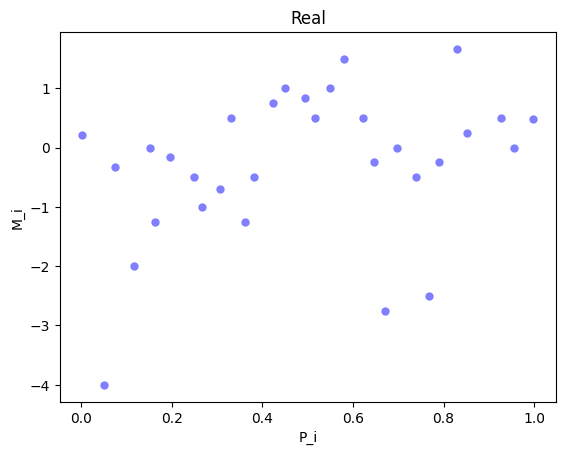

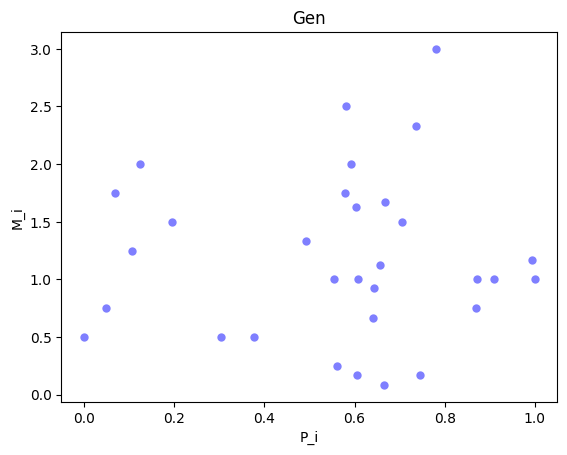

In [13]:
fig = plt.figure()
ax = plt.gca()
ax.plot(df[1][:],df[0][:], 'o', c='blue', alpha=0.5, markeredgecolor='none')
ax.set_title("Real")
ax.set_ylabel("M_i")
ax.set_xlabel("P_i")
# ax.set_ylim([-1,1])
#ax.set_yscale('log')
#ax.set_xscale('log')


fig = plt.figure()
ax = plt.gca()
ax.plot(np.abs(df[3][:]),np.abs(df[2][:]), 'o', c='blue', alpha=0.5, markeredgecolor='none')
ax.set_title("Gen")
ax.set_ylabel("M_i")
ax.set_xlabel("P_i")
# ax.set_ylim([-1,1])
#ax.set_yscale('log')
#ax.set_xscale('log')


